In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc

In [3]:
list_datasets = ['scardec_opt', 'scardec_moy', 'sigloch', 'isc', 'usgs', 'ye']

In [5]:
all_trapezium_params = {}
for dataset_wanted in list_datasets:
	with open(f"/home/earthquakes1/homes/Rebecca/phd/stf/figures/average_STF/average_best_fitting_models_dataset_{dataset_wanted}_v2.txt", 'r') as f:
		data = f.read()
		lines = data.split('\n')

		colors = cmc.batlow(np.linspace(0, 1, 5))
		unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
		dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

		if dataset_wanted.startswith('scardec'):
			color_for_dataset = dataset_colors['scardec']
		else:
			color_for_dataset = dataset_colors[dataset_wanted]

		trapezium_params = []

		current_magnitude_bin = None

		for line in lines:
			if 'Magnitude' in line:
				current_magnitude_bin = line
			elif 'Trapezium' in line:
				params = {}
				params['magnitude_bin'] = current_magnitude_bin
				params['fit_type'] = 'Trapezium'
			elif 'left flat' in line:
				parts = line.split(', ')
				for part in parts:
					key, value = part.split(': ')
					params[key.strip()] = float(value.strip())
				trapezium_params.append(params)
		all_trapezium_params[dataset_wanted] = trapezium_params


In [6]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}



In [7]:
trapezium_params = []
current_magnitude_bin = None

for line in lines:
	if 'Magnitude' in line:
		current_magnitude_bin = line
	elif 'Trapezium' in line:
		params = {}
		params['magnitude_bin'] = current_magnitude_bin
		params['fit_type'] = 'Trapezium'
	elif 'left flat' in line:
		parts = line.split(', ')
		for part in parts:
			key, value = part.split(': ')
			params[key.strip()] = float(value.strip())
		trapezium_params.append(params)
	


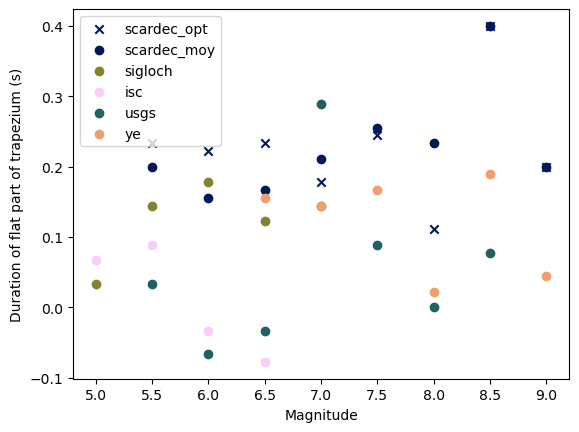

In [8]:
for dataset_wanted in list_datasets:
	if dataset_wanted.startswith('scardec'):
		color_for_dataset = dataset_colors['scardec']
	else:
		color_for_dataset = dataset_colors[dataset_wanted]
	trapezium_params = all_trapezium_params[dataset_wanted]
	for trap in trapezium_params:
		magnitude = float(trap['magnitude_bin'].split(' ')[1])
		if dataset_wanted == 'scardec_opt':
			plt.scatter([magnitude],[trap['right flat']-trap['left flat']], color=color_for_dataset, marker='x')
		else:
			plt.scatter([magnitude],[trap['right flat']-trap['left flat']], color=color_for_dataset)
	if dataset_wanted == 'scardec_opt':
		plt.scatter([],[], color=color_for_dataset, marker='x', label=dataset_wanted)
	else:
		plt.scatter([], [], label=dataset_wanted, color=color_for_dataset)
plt.xlabel('Magnitude')
plt.ylabel('Duration of flat part of trapezium (s)')
plt.legend()
#plt.show()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/average_STF/duration_of_flat_vs_magnitude.png')

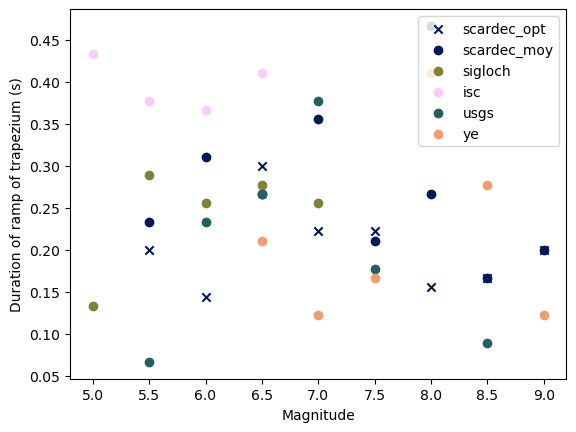

In [9]:
for dataset_wanted in list_datasets:
	if dataset_wanted.startswith('scardec'):
		color_for_dataset = dataset_colors['scardec']
	else:
		color_for_dataset = dataset_colors[dataset_wanted]
	trapezium_params = all_trapezium_params[dataset_wanted]
	for trap in trapezium_params:
		magnitude = float(trap['magnitude_bin'].split(' ')[1])
		if dataset_wanted == 'scardec_opt':
			plt.scatter([magnitude],[trap['left flat']-trap['ramp right']], color=color_for_dataset, marker='x')
		else:
			plt.scatter([magnitude],[trap['left flat']-trap['ramp right']],  color=color_for_dataset)
	if dataset_wanted == 'scardec_opt':
		plt.scatter([],[], color=color_for_dataset, marker='x', label=dataset_wanted)
	else:
		plt.scatter([], [], label=dataset_wanted, color=color_for_dataset)
plt.xlabel('Magnitude')
plt.ylabel('Duration of ramp of trapezium (s)')
plt.legend()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/average_STF/duration_of_ramp_vs_mag.png')

5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
5.0
5.5
6.0
6.5
7.0
5.0
5.5
here
6.0
6.5
5.5
6.0
6.5
7.0
7.5
8.0
8.5
6.5
7.0
7.5
8.0
8.5
9.0


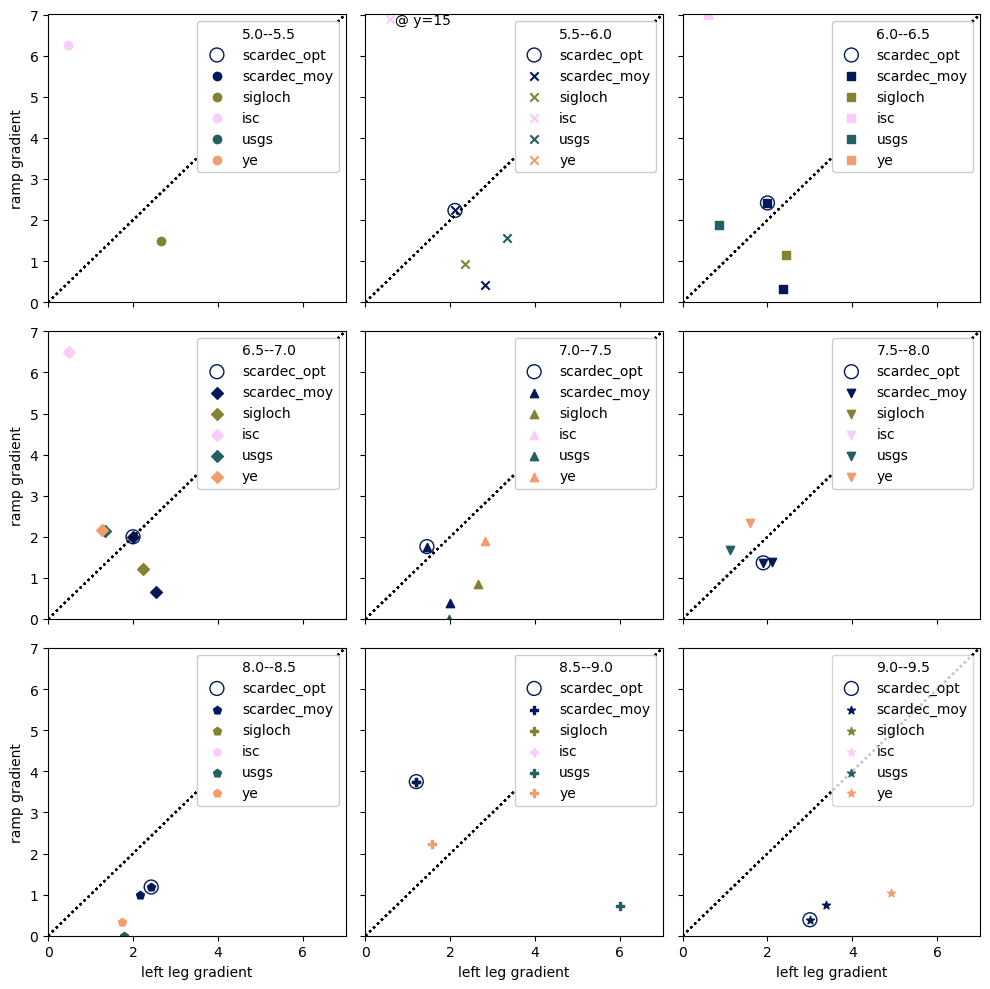

In [39]:
markers = ['o', 'x', 's', 'D', '^', 'v', 'p', 'P', '*', 'X']
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)


for magnitude in np.arange(5, 9.5, 0.5):
	fig_row = int((magnitude-5)*2) // 3
	fig_col = int((magnitude-5)*2) % 3
	axs[fig_row][fig_col].plot([], [], color='white', linestyle=':', label=f'{magnitude}--{magnitude+0.5}')



for dataset_wanted in list_datasets:
	if dataset_wanted.startswith('scardec'):
		color_for_dataset = dataset_colors['scardec']
	else:
		color_for_dataset = dataset_colors[dataset_wanted]
	trapezium_params = all_trapezium_params[dataset_wanted]
	for trap in trapezium_params:
		magnitude = float(trap['magnitude_bin'].split(' ')[1])
		fig_row = int((magnitude-5)*2) // 3
		fig_col = int((magnitude-5)*2) % 3
		# if magnitude >7:
		# 	continue
		print(magnitude)
		try:
			ramp_gradient = (trap['end ramp height']-trap['start height'])/trap['ramp right']
			left_leg_gradient = (trap['height']-trap['end ramp height'])/(trap['left flat'] - trap['ramp right'])
			axs[fig_row][fig_col].scatter([left_leg_gradient],
						[ramp_gradient], 
						color=color_for_dataset, 
						marker=markers[int((magnitude-5)*2)])
			if dataset_wanted == 'scardec_opt':
				axs[fig_row][fig_col].scatter([(trap['height']-trap['end ramp height'])/(trap['left flat'] - trap['ramp right'])],
					[(trap['end ramp height']-trap['start height'])/trap['ramp right']], 
					edgecolor=color_for_dataset, 
					facecolor='none',
					marker='o', s = 100)
			if ramp_gradient > 7:
				print('here')
				axs[fig_row][fig_col].scatter([left_leg_gradient], [6.9], color=color_for_dataset, marker=markers[int((magnitude-5)*2)])
				axs[fig_row][fig_col].annotate(f'@ y={ramp_gradient:.0f}', (left_leg_gradient + 0.1, 6.78))
			if left_leg_gradient > 7:
				print('there')
				axs[fig_row][fig_col].scatter([6.9], [ramp_gradient], color=color_for_dataset, marker=markers[int((magnitude-5)*2)])
				axs[fig_row][fig_col].annotate(r'$\uparrow$' + f'({left_leg_gradient:.2f}, {ramp_gradient:.2f})', (6.8, ramp_gradient + 0.07))
				

		except ZeroDivisionError:
			continue

count = 0
for ax in axs:
	for a in ax:
		for dataset_wanted in list_datasets:
			if dataset_wanted.startswith('scardec'):
				color_for_dataset = dataset_colors['scardec']
			else:
				color_for_dataset = dataset_colors[dataset_wanted]
			a.plot([0, 7.01], [0, 7.01], color='black', linestyle=':')
			a.set_xlim(0, 7.01)
			a.set_ylim(0, 7.01)
			if dataset_wanted == 'scardec_opt':
				a.scatter([], [], 
					edgecolor=color_for_dataset, 
					facecolor='none',
					marker='o', s = 100, label='scardec_opt')
			else:
				a.scatter([],[], color=color_for_dataset, marker=markers[count], label=dataset_wanted)

		a.legend(loc='upper right',framealpha=1 )
		count += 1

axs[1][0].plot()
# for magnitude in range(0, 10):
# 	plt.scatter([],[], label=f'M{magnitude/2+5}', color='black', marker=markers[magnitude])

# plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# plt.xlabel('left leg gradient')
# plt.ylabel('ramp gradient')

axs[0][0].set_ylabel('ramp gradient')
axs[1][0].set_ylabel('ramp gradient')
axs[2][0].set_ylabel('ramp gradient')
axs[2][0].set_xlabel('left leg gradient')
axs[2][1].set_xlabel('left leg gradient')
axs[2][2].set_xlabel('left leg gradient')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/average_STF/gradient_comparison_ramp_vs_left_leg.png')